# Factory 패턴

## F.1 소개

* Factory 패턴은 Creational Design Pattern, '객체를 생성하는 방식'을 정의한다.
* Client는 실제 사용하는 객체를 명시할 필요 없다. 팩토리가 생성해서 반환하는 객체를 사용한다.
* File 객체를 생성하는 경우, 실제 사용하는 객체의 생성을 open()함수 안에 은익한다.

구분 | 예 | 설명
-----|-----|-----
전 | File f=new File() | 실체 사용하는 File 객체를 생성한다.
후 | File f=open() | factory가 생성해서 반환하는 File 객체를 사용한다.

* 디자인패턴 요소

요소 | 설명
---|---
name | Factory
problem | 생성한 구체클래스의 변경에 따른 연쇄 수정.
solution | 생성을 감춤 (단순 factory, factory method, abstract factory
consequence | 사용할 객체가 많거나 객체를 생성하는 방법이 변경되어도, 연쇄적인 수정이 적어진다.

* 프로그래밍 예제
    * 'Pizza' (HFDP Ch4)
    * java valueOf(), getInstance(), newInstance()
```
Integer i=Integer.valueOf("100");
```

    * HotDraw shape    
    * 과제
        * case extension
            * simple factory - potato pizza
            * factory method - SMstyle potato pizza
            * abstract factory - potato (mashed, sliced)
        * new case -  도형
            * 도형의 Color, Shape의 경우 'Null Object Pattern'을 사용한다.

## F.2 문제

* 객체를 생성하는 'new'의 문제
    * 'new'는 인터페이스가 아니라 구체클래스를 생성.
    * 'new'를 호출. 구체클래스를 생성. DecoyDuck, MallardDuck, RubberDuck.
    * not closed for modification (생성할 객체가 늘어나면 클라이언트 수정량 많아짐)
    * 구체 클래스가 많아지거나, 변경되면 클라이언트 측의 변경이 뒤 따른다.


In [3]:
import iplantuml

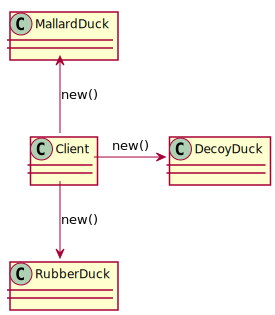

In [4]:
%%plantuml
@startuml
class Client
class MallardDuck
class DecoyDuck
class RubberDuck
Client -up-> MallardDuck:new()
Client -> DecoyDuck:new()
Client -down-> RubberDuck:new()
@enduml

## F.3 설계

* 'new'를 은익한다. encapsulate instantiation.
* 실제 사용할 객체를 은익하는 방법에 따라 Factory 방법을 구분할 수 있다.

Factory의 종류 | 구현 방법 | 소스코드
----------|----------|----------
Simple Factory | 단순 팩토리가 객체를 생성<br>if문으로 사용객체의 new()를 결정. | Pizza createPizza(type:String)<br>---------<br>팩토리를 사용해서 Pizza p=factory.createPizza("cheese")
Factory Method | Creator - 상속으로 하위클래스에게 위임해서 abstract factory method.<br>Product - factory에 대응하는 구조를 가진다.<br>GoF "Define an interface for creating an object, but let the classes which implement the interface decide which class to instantiate. The Factory method lets a class defer instantiation to subclasses" | 추상함수 구현 abstract Pizza createPizza(type:String)<br>---------<br>팩토리를 사용하지 않고 Pizza p=createPizza("cheese")
Abstract Factory | Creator - abstract factory 구조를 가진다.<br>Product - abstract factory를 사용한다.<br>GoF "to provide an interface for creating families of related or dependent objects without specifying their concrete classes." | 추상함수 구현 abstract Pizza createPizza(type:String)<br>---------<br>추상팩토리를 사용해서 new CheesePizza(f:PizzaIngredientFactory)

* Factory pattern에 사용되는 상속
    * 새로운 클래스가 추가되거나, 변경에도 많은 수정이 필요없다.
    * 컴파일 시점에 supertype을 사용한다. 즉, 사용할 객체 타잎만 결정하는 것이다.
    * 런타임에 실제 사용할 객체(subtype)를 결정하게 된다.

* DIP (Dependency Inversion Principle)
    * 구체클래스를 사용 (참조)하지 않는다. 부모클래스를 사용한다.
    * 구체클래스를 상속받지 않는다.
    * 부모클래스가 구현한 함수를 재정의하지 않는다. override하려면 부모 클래스의 함수는 abstract으로 정한다.


* Factory 패턴이 없다면 Client가 직접 Product을 생성한다.
* Pizza 사례에서, 고객이 직접 피자를 만드는 것과 같다.

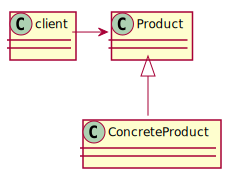

In [3]:
%%plantuml
@startuml
client -> Product
Product <|-- ConcreteProduct
@enduml

* 패턴이 적용되면 client는 Factory를 사용한다.
* 고객이 피자 가게에 주문하는 예를 들 수 있다.

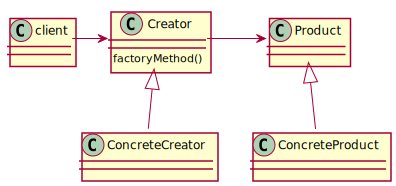

In [5]:
%%plantuml
@startuml
client -> Creator
Creator <|-- ConcreteCreator
Product <|-- ConcreteProduct
class Creator {
  factoryMethod()
}
Creator -right-> Product
@enduml

### F.3.1 simple factory

* Simple Factory가 어느 객체를 생성할지 판단하고, 사용자측에 맞는 객체를 반환한다.
    * 보통 'if' 문에서 문자열에 따라 생성할 객체를 결정한다.
    * 'if' 문을 사용하는 것이 'bad smell'이 있다.
    * Creator와 Product를 1:1로 하면 'if' 문이 제거될 수 있다. (참조: factory method에서 1:1 구조를 사용할 수 있다.)
* 클라이언트 PizzaStore는 직접 new()를 사용하지 않는다.

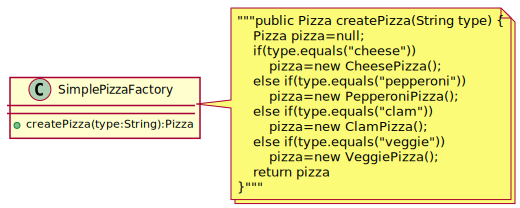

In [2]:
%%plantuml
@startuml

class SimplePizzaFactory {
    +createPizza(type:String):Pizza
}

note right
"""public Pizza createPizza(String type) {
    Pizza pizza=null;
    if(type.equals("cheese"))
        pizza=new CheesePizza();
    else if(type.equals("pepperoni"))
        pizza=new PepperoniPizza();
    else if(type.equals("clam"))
        pizza=new ClamPizza();
    else if(type.equals("veggie"))
        pizza=new VeggiePizza();
    return pizza
}"""
end note
@enduml

* PizzaStore는 SimplePizzaFactory를 가지고, 이를 통해서 pizza를 생성한다.

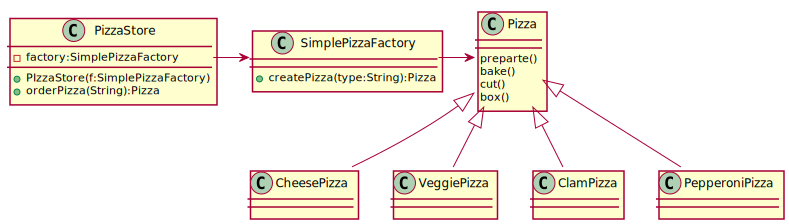

In [3]:
%%plantuml
@startuml
class PizzaStore {
    factory:SimplePizzaFactory
    +PizzaStore(f:SimplePizzaFactory)
    +orderPizza(type:String):Pizza
}
class SimplePizzaFactory {
  +createPizza(type:String):Pizza
}
class Pizza {
  preparte()
  bake()
  cut()
  box()
}
PizzaStore -> SimplePizzaFactory
SimplePizzaFactory -> Pizza
Pizza <|-- CheesePizza
Pizza <|-- VeggiePizza
Pizza <|-- ClamPizza
Pizza <|-- PepperoniPizza

@enduml

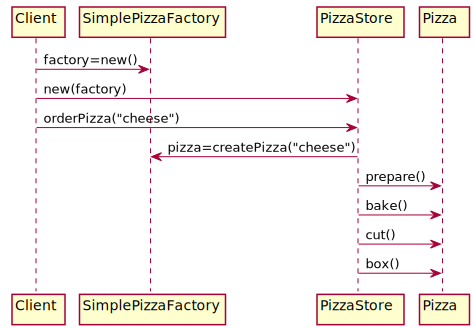

In [4]:
%%plantuml
@startuml
Client -> SimplePizzaFactory:factory=new()
Client -> PizzaStore:new(factory)
Client -> PizzaStore:orderPizza("cheese")
PizzaStore -> SimplePizzaFactory:pizza=createPizza("cheese")
PizzaStore -> Pizza:prepare()
PizzaStore -> Pizza:bake()
PizzaStore -> Pizza:cut()
PizzaStore -> Pizza:box()
@enduml

### F.3.2 factory method

* PizzaStore가 pizza를 생성하는 추상함수를 가진다. 이를 factory method라고 한다.
```
abstract Pizza createPizza(String type)
```

* factory method는 추상함수라서 실제 product이 실행시점에 결정된다.
    * PizzaStore에서 상속을 받아, 자식클래스가 실제 사용할 product 클래스를 생성한다.
    * 주문이 발생하는 orderPizza()가 호출되는 시점에 pizza가 createPizza()를 통해 실제 만들 product 클래스가 생성된다.

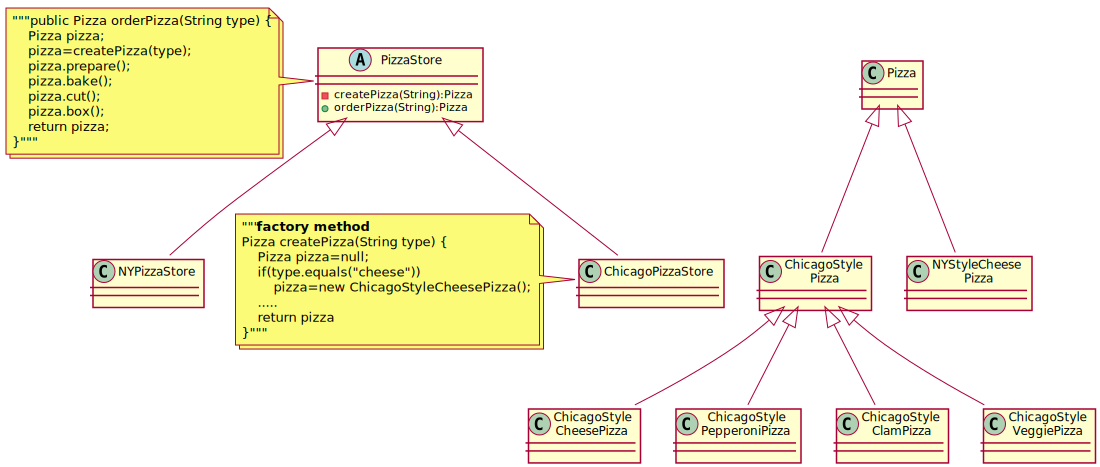

In [5]:
%%plantuml
@startuml
PizzaStore <|-- NYPizzaStore
PizzaStore <|-- ChicagoPizzaStore
Pizza <|-- "ChicagoStyle\nPizza"
Pizza <|-- "NYStyleCheese\nPizza"
"ChicagoStyle\nPizza" <|-- "ChicagoStyle\nCheesePizza"
"ChicagoStyle\nPizza" <|-- "ChicagoStyle\nPepperoniPizza"
"ChicagoStyle\nPizza" <|-- "ChicagoStyle\nClamPizza"
"ChicagoStyle\nPizza" <|-- "ChicagoStyle\nVeggiePizza"

abstract class PizzaStore {
  -{abstract}createPizza(String):Pizza
  +orderPizza(String):Pizza
}
note left of PizzaStore
"""public Pizza orderPizza(String type) {
    Pizza pizza;
    pizza=createPizza(type);
    pizza.prepare();
    pizza.bake();
    pizza.cut();
    pizza.box();
    return pizza;
}"""
end note
note left of ChicagoPizzaStore
"""<b>factory method</b>
Pizza createPizza(String type) {
    Pizza pizza=null;
    if(type.equals("cheese"))
        pizza=new ChicagoStyleCheesePizza();
    .....
    return pizza
}"""
end note
@enduml

### F.3.3 Abstract Factory

* PizzaStore에서 creator(factory)를 생성해서 Pizza에 전달
* creator
    * abstract factory구조, 구체적인 product를 사용하지 않는다.
        * PizzaIngredientFactory <|-- NYPizzaIngredientFactory, ChicagoPizzaIngredientFactory
* product
    * abstract products
    * 상속 또는 interface를 사용해 family of products를 제공,  구체 클래스에 대한 의존을 줄인다.
        * Dough <|.. Thick, Thin
        * Source <|.. PlumTomato, Marinara
        * Cheese <|.. Mozzarella, Reggiano
        * Clams <|.. Frozen, Fresh

* abstract factory와 factory method 비교
    * 추상 factory method를 사용한다는 점은 factory method와 동일하다.
    * product를 생성할 때, 추상 product를 사용한다는 점이 특징이다.

comparison | abstract factory | factory method
---|---|---
creator | abstract factory | abstract factory method
product | abstract products (family) | creator와 product의 대응 구조

```
%%dot digraph G {
    rankdir=TB;
    a -> b;
    b -> c[label=depends];
    b -> d;
}

%%dot digraph G {
    rankdir=TB;
    a -> b;
    b -> c [dir=back][label = "depends\nin reverse"];
    b -> d [dir=back];
}
```

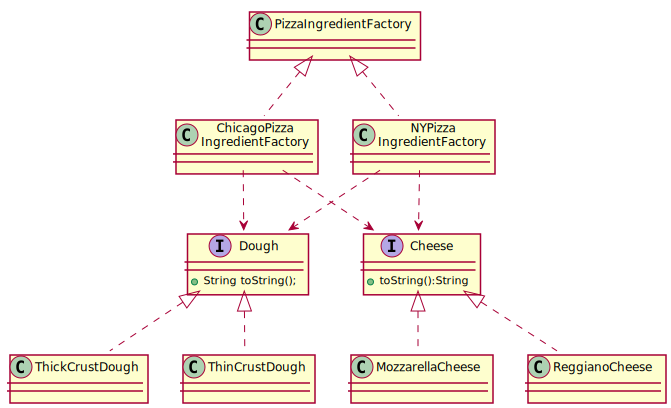

In [6]:
%%plantuml
@startuml

PizzaIngredientFactory <|.. "ChicagoPizza\nIngredientFactory"
PizzaIngredientFactory <|.. "NYPizza\nIngredientFactory"
"NYPizza\nIngredientFactory" ..> Dough
"NYPizza\nIngredientFactory" ..> Cheese
"ChicagoPizza\nIngredientFactory" ..> Dough
"ChicagoPizza\nIngredientFactory" ..> Cheese

interface Cheese {
    +toString():String
}
interface Dough {
    +String toString();
}
Cheese <|.. MozzarellaCheese
Cheese <|.. ReggianoCheese
Dough <|.. ThickCrustDough
Dough <|.. ThinCrustDough
@enduml

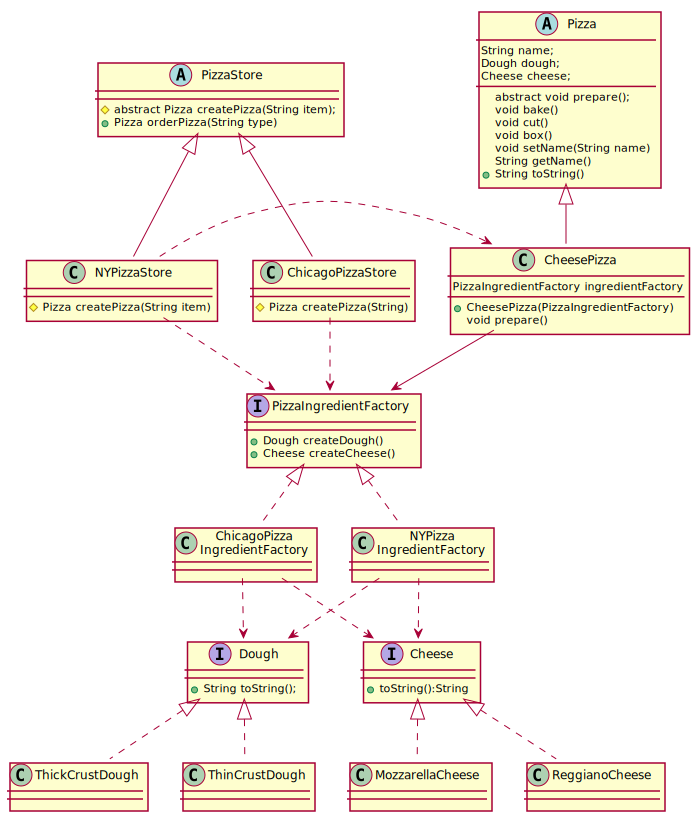

In [7]:
%%plantuml
@startuml

abstract class Pizza {
    String name; 
    Dough dough;
    Cheese cheese;

    abstract void prepare();
    void bake()
    void cut()
    void box()
    void setName(String name)
    String getName()
    +String toString()
}

class CheesePizza {
    PizzaIngredientFactory ingredientFactory
    +CheesePizza(PizzaIngredientFactory)
    void prepare()
}

Pizza <|-- CheesePizza

abstract class PizzaStore {
    #abstract Pizza createPizza(String item);
    +Pizza orderPizza(String type)
}   
class ChicagoPizzaStore {
    #Pizza createPizza(String)
}
class NYPizzaStore {
    #Pizza createPizza(String item)
}

PizzaStore <|-- ChicagoPizzaStore
PizzaStore <|-- NYPizzaStore
NYPizzaStore ..> PizzaIngredientFactory
ChicagoPizzaStore ..> PizzaIngredientFactory
NYPizzaStore .right.> CheesePizza
CheesePizza --> PizzaIngredientFactory 

interface PizzaIngredientFactory {
    +Dough createDough()
    +Cheese createCheese()
}
PizzaIngredientFactory <|.. "ChicagoPizza\nIngredientFactory"
PizzaIngredientFactory <|.. "NYPizza\nIngredientFactory"
"NYPizza\nIngredientFactory" ..> Dough
"NYPizza\nIngredientFactory" ..> Cheese
"ChicagoPizza\nIngredientFactory" ..> Dough
"ChicagoPizza\nIngredientFactory" ..> Cheese

interface Cheese {
    +toString():String
}
interface Dough {
    +String toString();
}
Cheese <|.. MozzarellaCheese
Cheese <|.. ReggianoCheese
Dough <|.. ThickCrustDough
Dough <|.. ThinCrustDough
@enduml

## F.4 사례

### F.4.1 Pizza
* 교재 HFDP Ch4 'Pizza'

#### F.4.1.1 simple factory

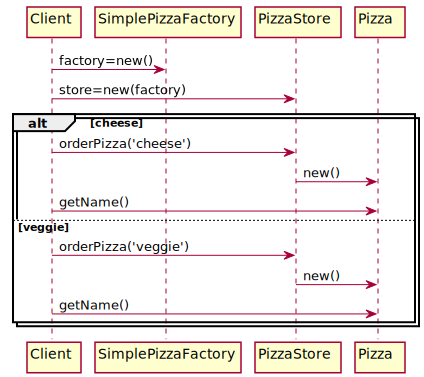

In [20]:
%%plantuml
@startuml
Client -> SimplePizzaFactory:factory=new()
Client -> PizzaStore:store=new(factory)
alt cheese
    Client -> PizzaStore:orderPizza('cheese')
    PizzaStore -> Pizza:new()
    Client -> Pizza:getName()
else veggie
    Client -> PizzaStore:orderPizza('veggie')
    PizzaStore -> Pizza:new()
    Client -> Pizza:getName()
end
@enduml

In [ ]:
# %load ./src/headfirst/factory/pizzas/PizzaTestDrive.java
package headfirst.factory.pizzas;

public class PizzaTestDrive {
 
	public static void main(String[] args) {
		SimplePizzaFactory factory = new SimplePizzaFactory();
		PizzaStore store = new PizzaStore(factory);

		Pizza pizza = store.orderPizza("cheese");
		System.out.println("We ordered a " + pizza.getName() + "\n");
 
		pizza = store.orderPizza("veggie");
		System.out.println("We ordered a " + pizza.getName() + "\n");
	}
}


In [ ]:
# %load ./src/headfirst/factory/pizzas/SimplePizzaFactory.java
package headfirst.factory.pizzas;

public class SimplePizzaFactory {
	public Pizza createPizza(String type) {
		Pizza pizza = null;
		if (type.equals("cheese")) {
			pizza = new CheesePizza();
		} else if (type.equals("pepperoni")) {
			pizza = new PepperoniPizza();
		} else if (type.equals("clam")) {
			pizza = new ClamPizza();
		} else if (type.equals("veggie")) {
			pizza = new VeggiePizza();
		}
		return pizza;
	}
}


In [ ]:
# %load ./src/headfirst/factory/pizzas/PizzaStore.java
package headfirst.factory.pizzas;

public class PizzaStore {
	SimplePizzaFactory factory;
	public PizzaStore(SimplePizzaFactory factory) { 
		this.factory = factory;
	}
	public Pizza orderPizza(String type) {
		Pizza pizza;
		pizza = factory.createPizza(type); 
		pizza.prepare();
		pizza.bake();
		pizza.cut();
		pizza.box();
		return pizza;
	}
}


In [ ]:
# %load ./src/headfirst/factory/pizzas/Pizza.java
package headfirst.factory.pizzas;

import java.util.ArrayList;

abstract public class Pizza {
	String name;
	String dough;
	String sauce;
	ArrayList toppings = new ArrayList();

	public String getName() {
		return name;
	}
	public void prepare() {
		System.out.println("Preparing " + name);
	}
	public void bake() {
		System.out.println("Baking " + name);
	}
	public void cut() {
		System.out.println("Cutting " + name);
	}
	public void box() {
		System.out.println("Boxing " + name);
	}
	public String toString() {
		// code to display pizza name and ingredients
		StringBuffer display = new StringBuffer();
		display.append("---- " + name + " ----\n");
		display.append(dough + "\n");
		display.append(sauce + "\n");
		for (int i = 0; i < toppings.size(); i++) {
			display.append((String )toppings.get(i) + "\n");
		}
		return display.toString();
	}
}


In [ ]:
# %load ./src/headfirst/factory/pizzas/CheesePizza.java
package headfirst.factory.pizzas;

public class CheesePizza extends Pizza {
	public CheesePizza() {
		name = "Cheese Pizza";
		dough = "Regular Crust";
		sauce = "Marinara Pizza Sauce";
		toppings.add("Fresh Mozzarella");
		toppings.add("Parmesan");
	}
}


#### F.4.1.2 factory method

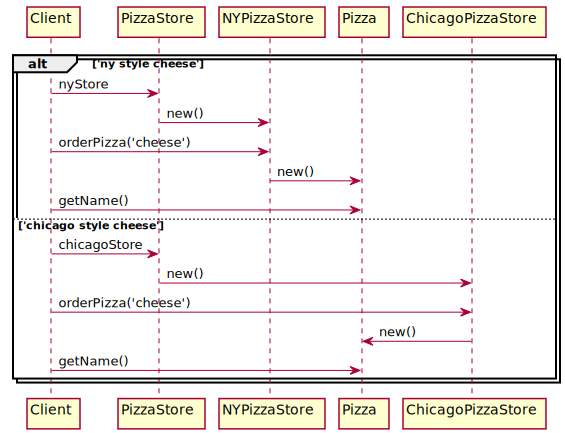

In [2]:
%%plantuml
@startuml
alt 'ny style cheese'
Client -> PizzaStore:nyStore
PizzaStore -> NYPizzaStore:new()
Client -> NYPizzaStore:orderPizza('cheese')
NYPizzaStore -> Pizza:new()
Client -> Pizza:getName()
else 'chicago style cheese'
Client -> PizzaStore:chicagoStore
PizzaStore -> ChicagoPizzaStore:new()
Client -> ChicagoPizzaStore:orderPizza('cheese')
ChicagoPizzaStore -> Pizza:new()
Client -> Pizza:getName()
end
@enduml

In [ ]:
# %load ./src/headfirst/factory/pizzafm/PizzaTestDrive.java
package headfirst.factory.pizzafm;

public class PizzaTestDrive { 
	public static void main(String[] args) {
		PizzaStore nyStore = new NYPizzaStore();
		PizzaStore chicagoStore = new ChicagoPizzaStore();
		Pizza pizza = nyStore.orderPizza("cheese");
		System.out.println("Ethan ordered a " + pizza.getName() + "\n");
		pizza = chicagoStore.orderPizza("cheese");
		System.out.println("Joel ordered a " + pizza.getName() + "\n");
		pizza = nyStore.orderPizza("clam");
		System.out.println("Ethan ordered a " + pizza.getName() + "\n");
		pizza = chicagoStore.orderPizza("clam");
		System.out.println("Joel ordered a " + pizza.getName() + "\n");
		pizza = nyStore.orderPizza("pepperoni");
		System.out.println("Ethan ordered a " + pizza.getName() + "\n");
		pizza = chicagoStore.orderPizza("pepperoni");
		System.out.println("Joel ordered a " + pizza.getName() + "\n");
		pizza = nyStore.orderPizza("veggie");
		System.out.println("Ethan ordered a " + pizza.getName() + "\n");
		pizza = chicagoStore.orderPizza("veggie");
		System.out.println("Joel ordered a " + pizza.getName() + "\n");
	}
}


In [ ]:
# %load ./src/headfirst/factory/pizzafm/PizzaStore.java
package headfirst.factory.pizzafm;

public abstract class PizzaStore {
 
	abstract Pizza createPizza(String item);
 
	public Pizza orderPizza(String type) {
		Pizza pizza = createPizza(type);
		System.out.println("--- Making a " + pizza.getName() + " ---");
		pizza.prepare();
		pizza.bake();
		pizza.cut();
		pizza.box();
		return pizza;
	}
}


In [ ]:
# %load ./src/headfirst/factory/pizzafm/NYPizzaStore.java
package headfirst.factory.pizzafm;

public class NYPizzaStore extends PizzaStore {
	Pizza createPizza(String item) {
		if (item.equals("cheese")) {
			return new NYStyleCheesePizza();
		} else if (item.equals("veggie")) {
			return new NYStyleVeggiePizza();
		} else if (item.equals("clam")) {
			return new NYStyleClamPizza();
		} else if (item.equals("pepperoni")) {
			return new NYStylePepperoniPizza();
		} else return null;
	}
}


In [ ]:
# %load ./src/headfirst/factory/pizzafm/Pizza.java
package headfirst.factory.pizzafm;

import java.util.ArrayList;

public abstract class Pizza {
	String name;
	String dough;
	String sauce;
	ArrayList toppings = new ArrayList();
	void prepare() {
		System.out.println("Preparing " + name);
		System.out.println("Tossing dough...");
		System.out.println("Adding sauce...");
		System.out.println("Adding toppings: ");
		for (int i = 0; i < toppings.size(); i++) {
			System.out.println("   " + toppings.get(i));
		}
	}
	void bake() {
		System.out.println("Bake for 25 minutes at 350");
	}
	void cut() {
		System.out.println("Cutting the pizza into diagonal slices");
	}
	void box() {
		System.out.println("Place pizza in official PizzaStore box");
	}
	public String getName() {
		return name;
	}
	public String toString() {
		StringBuffer display = new StringBuffer();
		display.append("---- " + name + " ----\n");
		display.append(dough + "\n");
		display.append(sauce + "\n");
		for (int i = 0; i < toppings.size(); i++) {
			display.append((String )toppings.get(i) + "\n");
		}
		return display.toString();
	}
}


In [ ]:
# %load ./src/headfirst/factory/pizzafm/NYStyleCheesePizza.java
package headfirst.factory.pizzafm;

public class NYStyleCheesePizza extends Pizza {

	public NYStyleCheesePizza() { 
		name = "NY Style Sauce and Cheese Pizza";
		dough = "Thin Crust Dough";
		sauce = "Marinara Sauce";
 
		toppings.add("Grated Reggiano Cheese");
	}
}


In [43]:
!javac -d classes/ -sourcepath src/ src/headfirst/factory/pizzafm/*.java

Picked up JAVA_TOOL_OPTIONS: -javaagent:/usr/share/java/jayatanaag.jar 
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
1 warning


In [44]:
!java -cp classes/ headfirst/factory/pizzafm/PizzaTestDrive

Picked up JAVA_TOOL_OPTIONS: -javaagent:/usr/share/java/jayatanaag.jar 
--- Making a NY Style Sauce and Cheese Pizza ---
Preparing NY Style Sauce and Cheese Pizza
Tossing dough...
Adding sauce...
Adding toppings: 
   Grated Reggiano Cheese
Bake for 25 minutes at 350
Cutting the pizza into diagonal slices
Place pizza in official PizzaStore box
Ethan ordered a NY Style Sauce and Cheese Pizza

--- Making a Chicago Style Deep Dish Cheese Pizza ---
Preparing Chicago Style Deep Dish Cheese Pizza
Tossing dough...
Adding sauce...
Adding toppings: 
   Shredded Mozzarella Cheese
Bake for 25 minutes at 350
Cutting the pizza into square slices
Place pizza in official PizzaStore box
Joel ordered a Chicago Style Deep Dish Cheese Pizza

--- Making a NY Style Clam Pizza ---
Preparing NY Style Clam Pizza
Tossing dough...
Adding sauce...
Adding toppings: 
   Grated Reggiano Cheese
   Fresh Clams from Long Island Sound
Bake for 25 minutes at 350
Cutting the pizza into diagonal slices
Place pizza in offic

#### F.4.1.3 abstract factory

* PizzaStore가 factory 역할을 한다.
* factory로 pizza를 생성할 때, 추상 product를 넘겨준다.
```
new CheesePizza(f:PizzaIngredientFactory)
```

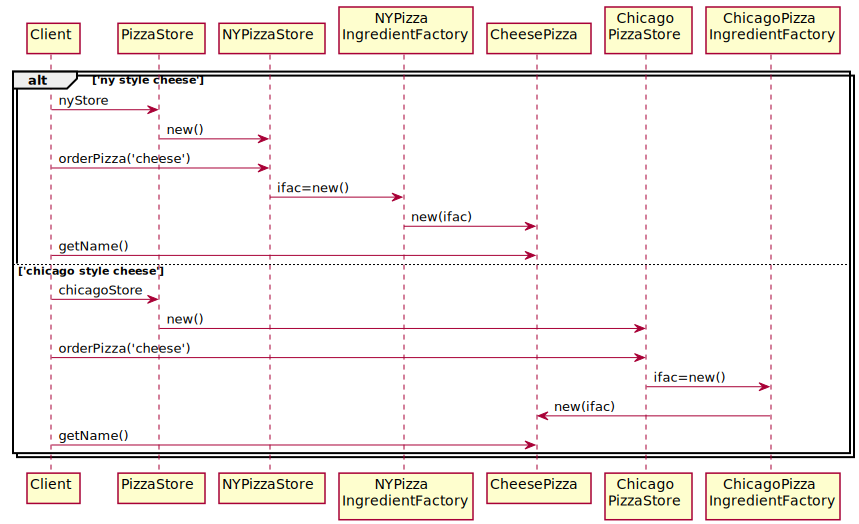

In [8]:
%%plantuml
@startuml
alt 'ny style cheese'
Client -> PizzaStore:nyStore
PizzaStore -> NYPizzaStore:new()
Client -> NYPizzaStore:orderPizza('cheese')
NYPizzaStore -> "NYPizza\nIngredientFactory":ifac=new()
"NYPizza\nIngredientFactory"->CheesePizza:new(ifac)
Client -> CheesePizza:getName()
else 'chicago style cheese'
Client -> PizzaStore:chicagoStore
PizzaStore -> "Chicago\nPizzaStore":new()
Client -> "Chicago\nPizzaStore":orderPizza('cheese')
"Chicago\nPizzaStore" -> "ChicagoPizza\nIngredientFactory":ifac=new()
"ChicagoPizza\nIngredientFactory"->CheesePizza:new(ifac)
Client -> CheesePizza:getName()
end
@enduml

In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/PizzaTestDrive.java
package headfirst.factory.pizzaaf.small;

public class PizzaTestDrive {
    public static void main(String[] args) {
        PizzaStore nyStore = new NYPizzaStore();
        PizzaStore chicagoStore = new ChicagoPizzaStore();
 
        Pizza pizza = nyStore.orderPizza("cheese");
        System.out.println("Ethan ordered a " + pizza + "\n");
 
        pizza = chicagoStore.orderPizza("cheese");
        System.out.println("Joel ordered a " + pizza + "\n");
	}
}

In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/PizzaStore.java
package headfirst.factory.pizzaaf.small;

public abstract class PizzaStore {
 
    protected abstract Pizza createPizza(String item);
 
    public Pizza orderPizza(String type) {
        Pizza pizza = createPizza(type);
        System.out.println("--- Making a " + pizza.getName() + " ---");
        pizza.prepare();
        pizza.bake();
        pizza.cut();
        pizza.box();
        return pizza;
    }
}


In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/NYPizzaStore.java
package headfirst.factory.pizzaaf.small;

public class NYPizzaStore extends PizzaStore {
    protected Pizza createPizza(String item) {
        Pizza pizza = null;
        PizzaIngredientFactory ingredientFactory=new NYPizzaIngredientFactory();
 
        if (item.equals("cheese")) {
  
            pizza = new CheesePizza(ingredientFactory);
            pizza.setName("New York Style Cheese Pizza");
  
        }
        return pizza;
    }
}


In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/ChicagoPizzaStore.java
package headfirst.factory.pizzaaf.small;

public class ChicagoPizzaStore extends PizzaStore {
    protected Pizza createPizza(String item) {
        Pizza pizza = null;
        PizzaIngredientFactory ingredientFactory=new ChicagoPizzaIngredientFactory();
        if (item.equals("cheese")) {
            pizza = new CheesePizza(ingredientFactory);
            pizza.setName("Chicago Style Cheese Pizza");
        }
        return pizza;
    }
}


In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/Pizza.java
package headfirst.factory.pizzaaf.small;

public abstract class Pizza {
    String name;
    Dough dough;
    Cheese cheese;

    abstract void prepare();
    void bake() {
        System.out.println("Bake for 25 minutes at 350");
    }
    void cut() {
        System.out.println("Cutting the pizza into diagonal slices");
    }
    void box() {
        System.out.println("Place pizza in official PizzaStore box");
    }
    void setName(String name) {
        this.name = name;
    }
    String getName() {
        return name;
    }
    public String toString() {
        StringBuffer result = new StringBuffer();
        result.append("---- " + name + " ----\n");
        if (dough != null) {
            result.append(dough);
            result.append("\n");
        }
        if (cheese != null) {
            result.append(cheese);
            result.append("\n");
        }
        return result.toString();
    }
}


In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/CheesePizza.java
package headfirst.factory.pizzaaf.small;

public class CheesePizza extends Pizza {
    PizzaIngredientFactory ingredientFactory;
 
    public CheesePizza(PizzaIngredientFactory ingredientFactory) {
        this.ingredientFactory = ingredientFactory;
    }
    void prepare() {
        System.out.println("Preparing " + name);
        dough = ingredientFactory.createDough();
        cheese = ingredientFactory.createCheese();
    }
}


In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/PizzaIngredientFactory.java
package headfirst.factory.pizzaaf.small;

public interface PizzaIngredientFactory {
    public Dough createDough();
    public Cheese createCheese();
}


In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/NYPizzaIngredientFactory.java
package headfirst.factory.pizzaaf.small;

public class NYPizzaIngredientFactory implements PizzaIngredientFactory {
    public Dough createDough() {
        return new ThinCrustDough();
    }
    public Cheese createCheese() {
        return new ReggianoCheese();
    }
}


In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/ChicagoPizzaIngredientFactory.java
package headfirst.factory.pizzaaf.small;

public class ChicagoPizzaIngredientFactory implements PizzaIngredientFactory {
    public Dough createDough() {
        return new ThickCrustDough();
    }
    public Cheese createCheese() {
        return new MozzarellaCheese();
    }
}


In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/Dough.java
package headfirst.factory.pizzaaf.small;

public interface Dough {
    public String toString();
}


In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/Cheese.java
package headfirst.factory.pizzaaf.small;

public interface Cheese {
    public String toString();
}


In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/ThinCrustDough.java
package headfirst.factory.pizzaaf.small;

public class ThinCrustDough implements Dough {
    public String toString() {
        return "Thin Crust Dough";
    }
}


In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/ThickCrustDough.java
package headfirst.factory.pizzaaf.small;

public class ThickCrustDough implements Dough {
    public String toString() {
        return "ThickCrust style extra thick crust dough";
    }
}


In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/MozzarellaCheese.java
package headfirst.factory.pizzaaf.small;

public class MozzarellaCheese implements Cheese {
    public String toString() {
        return "Shredded Mozzarella";
    }
}


In [ ]:
# %load ./src/headfirst/factory/pizzaaf/small/ReggianoCheese.java
package headfirst.factory.pizzaaf.small;

public class ReggianoCheese implements Cheese {
    public String toString() {
        return "Reggiano Cheese";
    }
}


In [41]:
!javac -d classes/ -sourcepath src/ src/headfirst/factory/pizzaaf/small/*.java

Picked up JAVA_TOOL_OPTIONS: -javaagent:/usr/share/java/jayatanaag.jar 
1 warning


In [42]:
!java -cp classes/ headfirst.factory.pizzaaf.small.PizzaTestDrive

Picked up JAVA_TOOL_OPTIONS: -javaagent:/usr/share/java/jayatanaag.jar 
--- Making a New York Style Cheese Pizza ---
Preparing New York Style Cheese Pizza
Bake for 25 minutes at 350
Cutting the pizza into diagonal slices
Place pizza in official PizzaStore box
Ethan ordered a ---- New York Style Cheese Pizza ----
Thin Crust Dough
Reggiano Cheese


--- Making a Chicago Style Cheese Pizza ---
Preparing Chicago Style Cheese Pizza
Bake for 25 minutes at 350
Cutting the pizza into diagonal slices
Place pizza in official PizzaStore box
Joel ordered a ---- Chicago Style Cheese Pizza ----
ThickCrust style extra thick crust dough
Shredded Mozzarella




### F.4.2 Shape

* Shape abstract factory (6.2 Shape)
    * creator
        * abstract factory구조
            * DrawingAbstractFactory <|-- ColorFactory, ShapeFactory
    * product
        * interface를 사용해 family of products를 제공함
            * Color <|.. Red, Green, Blue
            * Shape <|.. Rectangle, Square
    * **Null Object Pattern**
        * null 객체를 참조하면 발생할 수 있는 문제를 해결하기 위한 패턴, 보통 isNull()함수를 구현하지만, 여기서는 생략하지 않는다.
        * ColorFactory에서 사용하는 getShape()함수는 NullShape 객체를 반환하도록 한다.
        * ShapeFactory의 getColor()는 NullColor 객체를 반환한다.

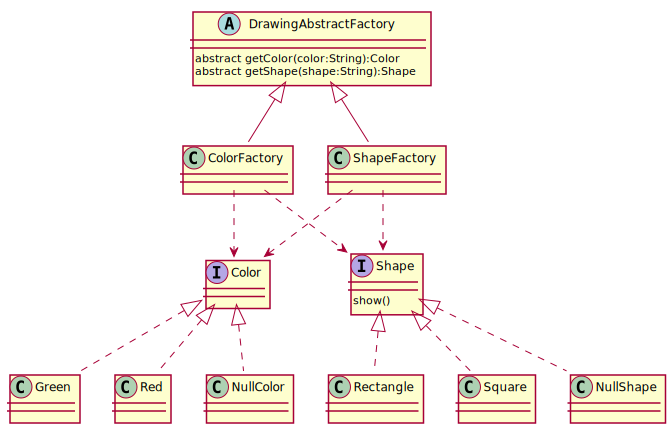

In [8]:
%%plantuml
@startuml
abstract class DrawingAbstractFactory {
    abstract getColor(color:String):Color
    abstract getShape(shape:String):Shape
}
DrawingAbstractFactory <|-- ColorFactory

interface Color
Color <|.. Green
Color <|.. Red
Color <|.. NullColor

DrawingAbstractFactory <|-- ShapeFactory
interface Shape {
    show()
}
Shape <|.. Rectangle
Shape <|.. Square
Shape <|.. NullShape

ColorFactory ..> Color
ColorFactory ..> Shape
ShapeFactory ..> Color
ShapeFactory ..> Shape

@enduml

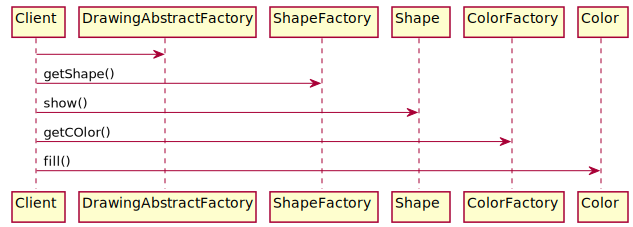

In [9]:
%%plantuml
@startuml
Client -> DrawingAbstractFactory
Client -> ShapeFactory:getShape()
Client -> Shape:show()
Client -> ColorFactory:getCOlor()
Client -> Color:fill()
@enduml

In [ ]:
# %load src/com/sd/shapeaf/DrawingTest.java
/*
    @author: tutorialspoint modified
    @version:v20151014
    javac -d classes/ -sourcepath src/ src/headfirst/factory/shapeaf/*.java
    java -cp classes/ com.sd.shapeaf.DrawingTest
*/
package com.sd.shapeaf;

public class DrawingTest {
    public static void main(String[] args) {
        DrawingAbstractFactory factory=new ShapeFactory();
        Shape s=factory.getShape("CIRCLE");
        s.show();
        System.out.println("---NULL COLOR");
        Color c=factory.getColor("red"); //ShapeFactory can not have Color
        c.fill();
        factory=new ColorFactory();
        c=factory.getColor("red");
        c.fill();
        System.out.println("---NULL SHAPE");
        s=factory.getShape("CIRCLE"); //ColorFactory can not have Shape
        s.show();
    }
}



In [ ]:
# %load src/com/sd/shapeaf/DrawingAbstractFactory.java
package com.sd.shapeaf;

public abstract class DrawingAbstractFactory {
    abstract Color getColor(String color);
    abstract Shape getShape(String shape);
}


In [ ]:
# %load src/com/sd/shapeaf/ColorFactory.java
package com.sd.shapeaf;

public class ColorFactory extends DrawingAbstractFactory {
    public Shape getShape(String shape) { return new NullShape(); }
    public Color getColor(String color) {
        Color s=null;
        String str=color.toLowerCase();
        System.out.println("getColor()"+str);
        if(str.equals("red"))
            s=new Red();
        else if(str.equals("green"))
            s=new Green();
        else if(str.equals("blue"))
            s=new Blue();
        return s;
    }
}


In [ ]:
# %load src/com/sd/shapeaf/Red.java
package com.sd.shapeaf;

public class Red implements Color {
    public void fill() {
        System.out.println("filling with red color...");
    }
}


In [ ]:
# %load src/com/sd/shapeaf/NullShape.java
package com.sd.shapeaf;

public class NullShape implements Shape {
    public void show() {
        System.out.println("showing null...");
    }
}
